In [1]:
#Analysis of developing retina, adult retina and developing neocortex (PFC)
import scanpy as sc
import matplotlib.pyplot as plt
from pathlib import Path

/home/mmiihkin/miniconda3/envs/scanpy311/lib/python3.11/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [6]:
# Zuckerberg collection of developing retina dataset
file_path = Path.home() / "Downloads" / "860a9839-5d24-4073-9a67-6ad570f41da1.h5ad"

# Load the AnnData object
adata = sc.read_h5ad(file_path)

In [15]:
adata.obs.columns

Index(['nCount_RNA', 'nFeature_RNA', 'Retina_Cells', 'percent.rb',
       'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'origin', 'timepoint',
       'EK_PB_annov1', 'development_stage_ontology_term_id',
       'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id',
       'disease_ontology_term_id', 'tissue_type', 'tissue_ontology_term_id',
       'cell_type_ontology_term_id', 'assay_ontology_term_id',
       'suspension_type', 'GSE', 'doi', 'donor_id', 'sample',
       'is_primary_data', 'cell_type', 'assay', 'disease', 'sex', 'tissue',
       'self_reported_ethnicity', 'development_stage', 'observation_joinid'],
      dtype='object')

In [4]:
adata.obs["donor_id"]

Hgw11.AAACCTGAGACAATAC.1_1     donor_1
Hgw11.AAACCTGAGACGCTTT.1_1     donor_1
Hgw11.AAACCTGAGCGTCTAT.1_1     donor_1
Hgw11.AAACCTGAGTTGAGTA.1_1     donor_1
Hgw11.AAACCTGCAAGTAATG.1_1     donor_1
                                ...   
TTTGGTTGTTATTCTC-1_23         donor_23
TTTGGTTTCCATTCAT-1_23         donor_23
TTTGTTGAGCATCGAG-1_23         donor_23
TTTGTTGCAAATACGA-1_23         donor_23
TTTGTTGCATGACTGT-1_23         donor_23
Name: donor_id, Length: 108838, dtype: category
Categories (22, object): ['donor_10', 'donor_11', 'donor_12', 'donor_13', ..., 'donor_6', 'donor_7', 'donor_8', 'donor_9']

/home/mmiihkin/miniconda3/envs/scanpy311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_6545/1114822096.py:7: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=1.5, key_added="leiden")


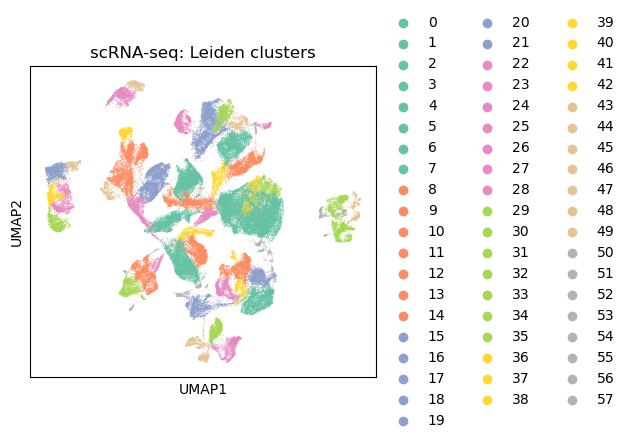

In [7]:
import scanpy as sc
import pandas as pd


sc.tl.pca(adata)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
sc.tl.leiden(adata, resolution=1.5, key_added="leiden")
sc.tl.umap(adata, random_state=0)
ax = sc.pl.umap(
    adata,
    color="leiden",
    palette="Set2",
    legend_loc="right margin",
    title="scRNA-seq: Leiden clusters",
    show=False
)

import matplotlib.pyplot as plt
# Rasterize only the point cloud(s)
for coll in ax.collections:
    coll.set_rasterized(True)

plt.tight_layout()
ax.set_aspect("equal")
plt.savefig("umap_retina_developing_scRNAseq_leiden.svg", dpi=600, bbox_inches="tight")
plt.show()


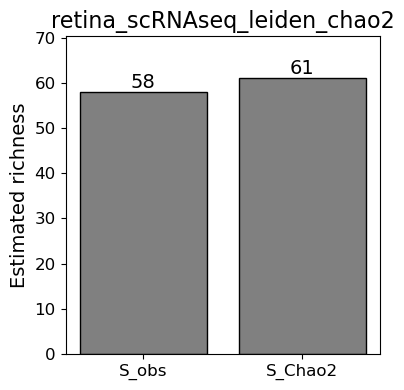

In [16]:
ct = pd.crosstab(
    adata.obs["leiden"],
    adata.obs["donor_id"]
)

ct

ctab_binary = (ct > 0).astype(int)
plot_chao2_barplot(ctab_binary, name="retina_scRNAseq_leiden_chao2")



In [ ]:
# Zuckerberg collection
file_path = Path.home() / "Downloads" / "7b582c37-37ad-49d2-a369-06f38289031e.h5ad"

# Load the AnnData object
adata = sc.read_h5ad(file_path)

In [ ]:
import scanpy as sc
import pandas as pd
#Take only developing PFC
adata = adata[adata.obs["Region"] == "PFC"].copy()
#Remove stale diffmap embeddings
adata.obsm.pop("X_diffmap", None)
adata.uns.pop("diffmap_evals", None)   # safe even if missing
adata.uns.pop("diffmap", None)         # optional: remove other diffmap metadata

sc.tl.pca(adata)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
sc.tl.leiden(adata, resolution=1.5, key_added="leiden")
sc.tl.umap(adata, random_state=0)
ax = sc.pl.umap(
    adata,
    color="leiden",
    palette="Set2",
    legend_loc="right margin",
    title="scRNA-seq: Leiden clusters",
    show=False
)

import matplotlib.pyplot as plt
# Rasterize only the point cloud(s)
for coll in ax.collections:
    coll.set_rasterized(True)

plt.tight_layout()
ax.set_aspect("equal")
plt.savefig("umap_human_neocortex_scRNAseq_leiden.svg", dpi=600, bbox_inches="tight")
plt.show()


In [ ]:
ct = pd.crosstab(
    adata.obs["leiden"],
    adata.obs["donor_id"]
)

ct

ctab_binary = (ct > 0).astype(int)
plot_chao2_barplot(ctab_binary, name="dev_PFC_scRNAseq_leiden_chao2")



In [15]:
import numpy as np
import matplotlib.pyplot as plt

def chao2(ctab_binary, axis=1):
    incidence = np.sum(ctab_binary, axis=axis)

    S_obs = np.sum(incidence > 0)
    Q1 = np.sum(incidence == 1)
    Q2 = np.sum(incidence == 2)

    S_Chao2 = S_obs + (Q1**2) / (2 * Q2) if Q2 > 0 else S_obs

    return S_obs, Q1, Q2, S_Chao2

def plot_chao2_barplot(ctab_binary, name, axis=1):
    S_obs, _, _, S_Chao2 = chao2(ctab_binary, axis=axis)

    values = [S_obs, S_Chao2]
    labels = ["S_obs", "S_Chao2"]

    plt.figure(figsize=(4, 4))

    bars = plt.bar(
        labels,
        values,
        color="gray",
        edgecolor="black"
    )

    # ✅ Set axis label fontsize
    plt.ylabel("Estimated richness", fontsize=14)

    # ✅ Set title fontsize
    plt.title(name, fontsize=16)

    # ✅ Set tick fontsize
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Force y-axis to start at 0 and show full range
    ymax = max(values) * 1.15
    plt.ylim(0, ymax)

    # Add numbers on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(round(height))}",
            ha="center",
            va="bottom",
            fontsize=14
        )

    plt.tight_layout()
    plt.savefig(f"{name}_chao2_barplot.svg", bbox_inches="tight")
    plt.show()


In [8]:
ct = pd.crosstab(
    adata.obs["leiden"],
    adata.obs["donor_id"]
)

ct

ctab_binary = (ct > 0).astype(int)
plot_chao2_barplot(ctab_binary, name="retina_developing_scRNAseq_leiden_chao2")

NameError: name 'plot_chao2_barplot' is not defined

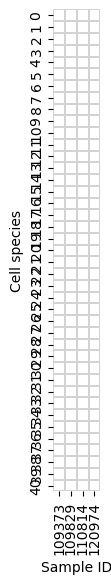

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

n_rows, n_cols = ctab_binary.shape

# Scale figure size to data shape
figsize = (n_cols * 0.3, n_rows * 0.3)

plt.figure(figsize=figsize)

ax = sns.heatmap(
    ctab_binary,
    cmap=["white", "black"],
    cbar=False,
    square=True,
    linewidths=0.3,
    linecolor="lightgrey"
)

ax.set_aspect("equal")

plt.xlabel("Sample ID")
plt.ylabel("Cell species")
plt.tight_layout()
plt.savefig("cluster_vs_sample_fetus.svg", format="svg", bbox_inches="tight")
plt.show()